# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Загрузка данных данных

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

def line():
    print('-----------------------------------------------------------------------------')

In [2]:
gold_train = pd.read_csv('/datasets/gold_recovery_train.csv')
gold_test = pd.read_csv('/datasets/gold_recovery_test.csv')
gold_full = pd.read_csv('/datasets/gold_recovery_full.csv')

print(gold_train.info())
line()
print(gold_test.info())
line()
print(gold_full.info())

display(gold_full.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
# Вычислим эффективность обогащения

calculation_recovery = pd.DataFrame()

calculation_recovery = (
    ((gold_train['rougher.output.concentrate_au'] *
    (gold_train['rougher.input.feed_au'] - gold_train['rougher.output.tail_au'])) 
    
    /
    
    (gold_train['rougher.input.feed_au'] *
    (gold_train['rougher.output.concentrate_au'] - gold_train['rougher.output.tail_au']))) * 100
    
)

# Сложные манипуляции потому что мы не можем передать Nan, и если их убрать и там и там то размерности
# почему то не совпадают, но по логике вроде все сейчас сходится

print('Среднее абсолютное отклонение: ', mean_absolute_error(gold_train['rougher.output.recovery'].dropna(), calculation_recovery[gold_train['rougher.output.recovery'].dropna().index]))

Среднее абсолютное отклонение:  9.444891926100695e-15


Комментарий: Данный показатель MAE говорит нам о том что от истинных значений в среднем мы отклоняемся на очень очень маленькую величину в -15 степени, это говорит о том, что эффективность обогащения рассчитана правильно

In [4]:
# Данные которые отсутствуют в тестовом наборе
result = []
for train_val in gold_train.columns:
    flag = False
    for test_val in gold_test.columns:
        if train_val == test_val:
            flag = True
            break;
    if not(flag):
        result.append(train_val)

Комментарий: Все полученные призначки относятся к типу output (параметры продукта), на каждом этапе обработки. Также отсутствует целевой признак. Как было сказано в условии задачи эти столбцы получены после обработки и нужны для рассчета

## Предобработка данных

In [5]:
# Cтроки дубликаты
print('Количество строк дубликатов:', gold_train.duplicated().sum())
print(gold_train.isnull().sum())
line()

len_data = len(gold_train)

# Тут я хочу убедиться, что если удалить пропуски в столбцах в которых пропусков меньше 7 процентов,
# остануться те столбцы в которых их больше чем 7% если это так то их лучше заменить на медиану, если
# нет, тогда можно дропать все остальное потому что понять что там в этих флуктуациях происходит
# достаточно запарно

for number_column in range(len(gold_train.columns) - 1):
    if ((gold_train.isnull().sum()[number_column + 1] / len_data) < 0.07):
        gold_train.dropna(subset = [gold_train.columns[number_column + 1]], inplace = True)
                
print(gold_train.isnull().sum())

# Ну нет, так нет)

gold_train = gold_train.dropna().reset_index(drop = True)

# Тоже самое делаем и для тестового набора

gold_test = gold_test.dropna().reset_index(drop = True)

Количество строк дубликатов: 0
date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64
-----------------------------------------------------------------------------
date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floa

Комментарий: В данной задаче очень важно определять выходное значение по исходным данным, я считаю что отсутствие какого либо признака в строке говорит или о не точном рассчете или ошибкой выгрузки или вообще что угодно неправильное... заполнять такие значения медианой возможно не совсем целесообразно и тем более я хотел оставить пропуски которых больше 10% но как то не особо удалось потому что все пропуски взаимосвязаны между собой сокращая пропуски в одной строке сокращаются соответственно и другие

In [6]:
# Сохраним цели в отдельные переменные

targets_train = (
    pd.DataFrame({'rougher': gold_train['rougher.output.recovery'],
                  'final': gold_train['final.output.recovery']
                  })
                )

targets_test = gold_test.merge(gold_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on = 'date')
targets_test = (
    pd.DataFrame({'rougher': targets_test['rougher.output.recovery'],
                  'final': targets_test['final.output.recovery']
                  })
                )

In [7]:
gold_train = gold_train[gold_test.columns]

# Нахождение мультиколлениарных столбцов

corr_df = gold_train.corr()

result = []

for name_row in corr_df:
    if len(corr_df[name_row].loc[(abs(corr_df[name_row]) > 0.7) & (corr_df[name_row] != 1)]) > 0:   
        result.append(list(corr_df[name_row].loc[(corr_df[name_row] > 0.7) & (corr_df[name_row] != 1)].index))

string = ''

for i in range(len(result)):
    string += ' '.join(result[i])
    string += ' '


multi_col_row = list(pd.Series(string.split()).unique())
print('Количество коррелирующих между собой столбцов:', len(multi_col_row))

# Очищенный от мультиколлениарности трейн

not_corr_gold_train = gold_train.drop(multi_col_row, axis=1)
display(not_corr_gold_train.corr())

Количество коррелирующих между собой столбцов: 38


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_d_air,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
primary_cleaner.input.sulfate,1.000000,0.397034,0.048996,0.212043,0.127924,0.194824,0.093682,0.329382,0.291949,0.160258,0.071523,-0.078166,-0.094185,-0.156410
primary_cleaner.input.depressant,0.397034,1.000000,0.104376,0.284543,-0.066850,0.045936,0.069278,0.017755,-0.014541,-0.233085,0.056640,-0.013475,-0.189734,-0.125439
primary_cleaner.input.feed_size,0.048996,0.104376,1.000000,-0.040412,-0.170999,0.045276,-0.068106,0.009681,-0.199935,-0.321662,0.061127,0.126348,0.144479,0.084935
primary_cleaner.input.xanthate,0.212043,0.284543,-0.040412,1.000000,0.099419,0.236410,0.156541,0.152979,0.117879,-0.063365,-0.057422,-0.129291,-0.225788,-0.094876
primary_cleaner.state.floatbank8_d_air,0.127924,-0.066850,-0.170999,0.099419,1.000000,-0.100285,0.070331,0.170002,0.233858,0.369882,0.106837,-0.047237,0.061226,-0.115520
rougher.input.feed_rate,0.194824,0.045936,0.045276,0.236410,-0.100285,1.000000,0.316187,0.534909,-0.096267,-0.002492,-0.159134,-0.057248,-0.317488,0.030114
rougher.input.feed_size,0.093682,0.069278,-0.068106,0.156541,0.070331,0.316187,1.000000,0.298893,0.067176,0.158749,-0.118384,-0.009293,-0.200052,0.065301
rougher.input.feed_sol,0.329382,0.017755,0.009681,0.152979,0.170002,0.534909,0.298893,1.000000,0.169745,0.311026,-0.010028,-0.097659,-0.166629,-0.017022
rougher.state.floatbank10_a_air,0.291949,-0.014541,-0.199935,0.117879,0.233858,-0.096267,0.067176,0.169745,1.000000,0.570661,0.278953,-0.154081,0.087090,-0.035366
rougher.state.floatbank10_a_level,0.160258,-0.233085,-0.321662,-0.063365,0.369882,-0.002492,0.158749,0.311026,0.570661,1.000000,0.103599,-0.234243,-0.180333,0.114346


Комментарий: После того как мы получили полностью таблицу без мультиколлениарности, я не знаю что будет, посмотрим что произойдет при обучении. Но как итог очень много ушло столбцов, но как мы знаем деревья не чувствительны к мультиколлениарности, а вот с линейной регрессией все наоборот, поживем, увидим

## Анализ данных

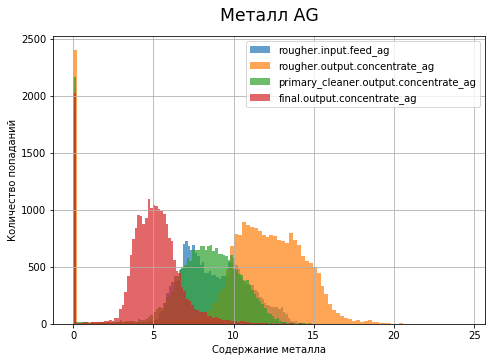

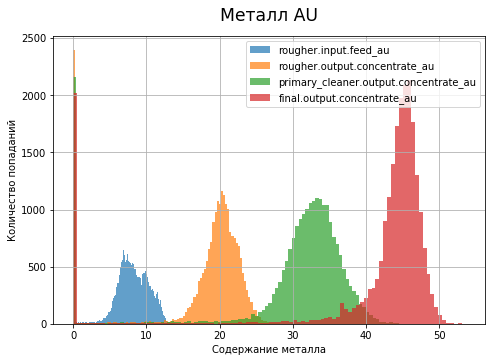

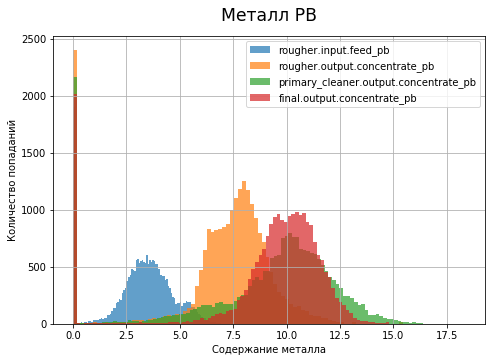

In [9]:
metall = ['ag', 'au', 'pb']
i = 0

bins_val = 100

for element in metall:
    
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.grid()
    ax.set_xlabel('Содержание металла')
    ax.set_ylabel('Количество попаданий')
    
    plt.suptitle('Металл ' + metall[i].upper() , x=0.5, y=1.1, ha='center', fontsize='xx-large')
    plt.hist(gold_full['rougher.input.feed_' + element], alpha=0.7, label='rougher.input.feed_' + element, bins = bins_val)
    plt.hist(gold_full['rougher.output.concentrate_' + element], alpha=0.7, label='rougher.output.concentrate_' + element, bins = bins_val)
    plt.hist(gold_full['primary_cleaner.output.concentrate_' + element], alpha=0.7, label='primary_cleaner.output.concentrate_' + element, bins = bins_val)
    plt.hist(gold_full['final.output.concentrate_' + element], alpha=0.7, label='final.output.concentrate_' + element, bins = bins_val)
    
    plt.legend(loc='upper right')
    plt.show()
    
    i += 1

Комментарий: Как видно на каждом этапе каждый металл ведет себя абсолютно по разному. С помощью данных гистограмм можно определить содержание какого металла и на каком этапе -> min или -> max. Например максимальная концентрация Ag на этапе rougher.output.concentrate_ag, максимальная концентрация Au на этапе final.output.concentrate_au, максимальная концентрация Pb на этапе final.output.concentrate_pb

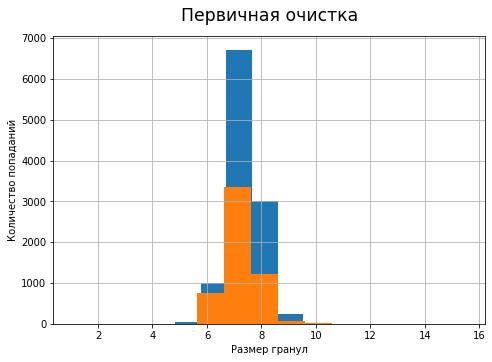

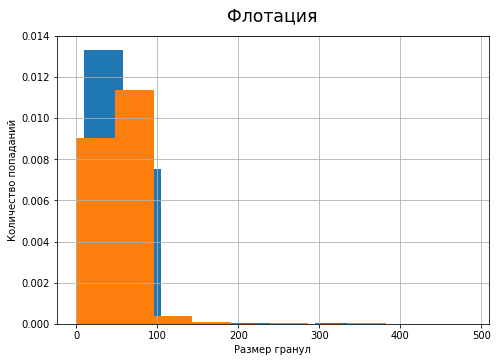

In [10]:
# Сравнение размеров гранул

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.grid()
ax.set_xlabel('Размер гранул')
ax.set_ylabel('Количество попаданий')
plt.suptitle('Первичная очистка', x=0.5, y=1.1, ha='center', fontsize='xx-large')

gold_train['primary_cleaner.input.feed_size'].hist()
gold_test['primary_cleaner.input.feed_size'].hist()

plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.grid()
ax.set_xlabel('Размер гранул')
ax.set_ylabel('Количество попаданий')
plt.suptitle('Флотация', x=0.5, y=1.1, ha='center', fontsize='xx-large')

gold_train['rougher.input.feed_size'].hist(density=True)
gold_test['rougher.input.feed_size'].hist(density=True)

plt.show()

Комментарий: Распределения гранул не сильно отличаются на трейне и тесте, можно обучать

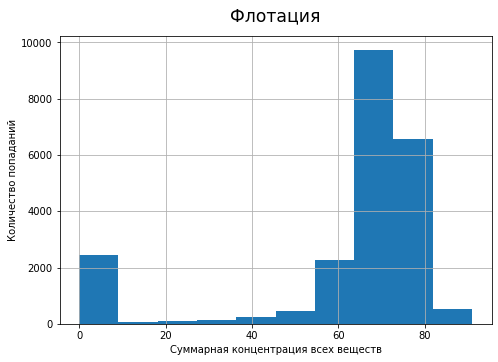

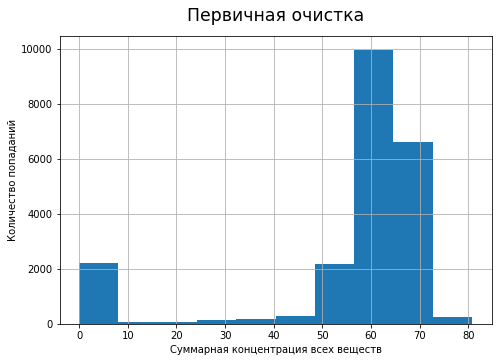

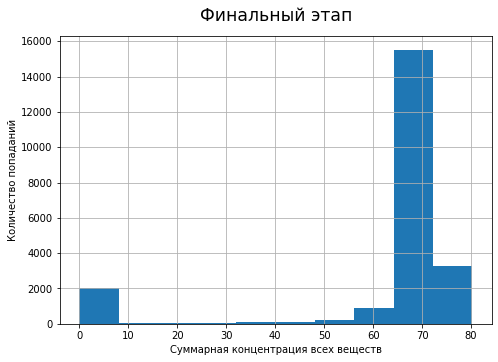

In [11]:
# Cуммарная концентрация всех веществ на разных стадиях

rougher_sum = (
    gold_full['rougher.output.concentrate_ag'] +
    gold_full['rougher.output.concentrate_pb'] +
    gold_full['rougher.output.concentrate_sol'] +
    gold_full['rougher.output.concentrate_au']
)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.grid()
ax.set_xlabel('Суммарная концентрация всех веществ')
ax.set_ylabel('Количество попаданий')
plt.suptitle('Флотация', x=0.5, y=1.1, ha='center', fontsize='xx-large')

rougher_sum.hist()
plt.show()

primary_cleaner_sum = (
    gold_full['primary_cleaner.output.concentrate_ag'] +
    gold_full['primary_cleaner.output.concentrate_pb'] +
    gold_full['primary_cleaner.output.concentrate_sol'] +
    gold_full['primary_cleaner.output.concentrate_au']
)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.grid()
ax.set_xlabel('Суммарная концентрация всех веществ')
ax.set_ylabel('Количество попаданий')
plt.suptitle('Первичная очистка', x=0.5, y=1.1, ha='center', fontsize='xx-large')

primary_cleaner_sum.hist()
plt.show()

final_concentrate_sum = (
    gold_full['final.output.concentrate_ag'] +
    gold_full['final.output.concentrate_pb'] + 
    gold_full['final.output.concentrate_sol'] + 
    gold_full['final.output.concentrate_au']
)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.grid()
ax.set_xlabel('Суммарная концентрация всех веществ')
ax.set_ylabel('Количество попаданий')
plt.suptitle('Финальный этап', x=0.5, y=1.1, ha='center', fontsize='xx-large')

final_concentrate_sum.hist()
plt.show()

Комментарий: Мы видим, что у нас есть около нулевые выбросы, как мы говорили ранее удалять их или нет, это скорее вопрос для бизнеса, с точки зрения обучения я бы не стал их удалять количество таких выбросов 2к, если их выкинуть, то: 1. Мы не сможем определять данный тип т.е определять сырье с низким содержанием золота; 2. Ошибка будет больше из-за того, что мы не можем как раз таки определять данный класс. Я все же делаю вывод, что удалять эти данные не стоит

## Модель

In [12]:
gold_train = gold_train.drop(['date'], axis = 1)
gold_test = gold_test.drop(['date'], axis = 1)

In [13]:
def sMAPE(target, predict):
    result = (
            
        (abs(target - predict) / 
        ((abs(target) + abs(predict)) / 2)) * 100
        
    )
    
    return result.sum() / len(target)

In [14]:
# Проведем обучение с помощью кросс валидации на разных моделях

size_sample = int(len(gold_train) / 5)
scores = []

for step in range(0, len(gold_train), size_sample):
    valid_f = gold_train[step: step + size_sample]
    train_f = gold_train.drop(valid_f.index)

    valid_t = targets_train[step: step + size_sample]
    train_t = targets_train.drop(valid_t.index)

    model_LR = LinearRegression()
    model_LR.fit(train_f, train_t)

    predict = model_LR.predict(valid_f)

    scores.append(sMAPE(valid_t, predict))

print('Итоговый sMAPE', (sum(scores) / len(scores))[0] * 0.25 + (sum(scores) / len(scores))[1] * 0.75)

Итоговый sMAPE 9.095041149251713


In [15]:
scores = []

for depth in range(1, 6):
    for step in range(0, len(gold_train), size_sample):
        valid_f = gold_train[step: step + size_sample]
        train_f = gold_train.drop(valid_f.index)

        valid_t = targets_train[step: step + size_sample]
        train_t = targets_train.drop(valid_t.index)

        model_DTR = DecisionTreeRegressor(random_state = 12345, max_depth=depth)
        model_DTR.fit(train_f, train_t)

        predict = model_DTR.predict(valid_f)

        scores.append(sMAPE(valid_t, predict))
    
    result = (sum(scores) / len(scores))[0] * 0.25 + (sum(scores) / len(scores))[1] * 0.75
    print('Итоговый sMAPE при depth =', str(depth) + ':', result)

Итоговый sMAPE при depth = 1: 9.600912891875698
Итоговый sMAPE при depth = 2: 9.207330437979747
Итоговый sMAPE при depth = 3: 8.976031943417933
Итоговый sMAPE при depth = 4: 8.91210245589508
Итоговый sMAPE при depth = 5: 8.926452799343966


In [23]:
scores = []
tscv = TimeSeriesSplit()

for est in range(1, 6):
    for depth in range (1, 6):
        for step in range(0, len(gold_train), size_sample):

            valid_f = gold_train[step: step + size_sample]
            train_f = gold_train.drop(valid_f.index)

            valid_t = targets_train[step: step + size_sample]
            train_t = targets_train.drop(valid_t.index)
            
            model_RFR = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
            model_RFR.fit(train_f, train_t)
    
            predict = model_RFR.predict(valid_f)

            scores.append(sMAPE(valid_t, predict))

        print('Итоговый sMAPE при depth =', str(depth) + ':', 'и est =', str(est) + ':', (sum(scores) / len(scores))[0] * 0.25 + (sum(scores) / len(scores))[1] * 0.75)
    line()

Итоговый sMAPE при depth = 1: и est = 1: 9.525057723528777
Итоговый sMAPE при depth = 2: и est = 1: 9.124481428962886
Итоговый sMAPE при depth = 3: и est = 1: 8.925750491604774
Итоговый sMAPE при depth = 4: и est = 1: 8.857501476736733
Итоговый sMAPE при depth = 5: и est = 1: 8.879212686192785
-----------------------------------------------------------------------------
Итоговый sMAPE при depth = 1: и est = 2: 8.919004854520175
Итоговый sMAPE при depth = 2: и est = 2: 8.878264473686473
Итоговый sMAPE при depth = 3: и est = 2: 8.827272245035141
Итоговый sMAPE при depth = 4: и est = 2: 8.801092772522829
Итоговый sMAPE при depth = 5: и est = 2: 8.804556916957601
-----------------------------------------------------------------------------
Итоговый sMAPE при depth = 1: и est = 3: 8.835986890730515
Итоговый sMAPE при depth = 2: и est = 3: 8.8235464966796
Итоговый sMAPE при depth = 3: и est = 3: 8.788400904833289
Итоговый sMAPE при depth = 4: и est = 3: 8.762429572738379
Итоговый sMAPE при d

Комментари: В итоге мы получили следующее, что дерево показывает наилучший результат, как сильно его обучать? Зависит от задачи какая точность нам нужна, остановимся на глубине 20. Остальные модели показывают себя гораздо хуже.

In [21]:
predict = model_RFR.predict(gold_test)
result = sMAPE(targets_test, predict)
print('Итоговый sMAPE', result[0] * 0.25 + result[1] * 0.75)

Итоговый sMAPE 9.5166141896469


Вывод: Данный проект имеет много решений, исходя из того, что нужно бизнесу. Мое исследование привело меня к тому, что лучшей моделью оказалась модель модель DecisionTreeRegressor, точность можно улучшить, но если это понадобится. Также я посмотрел что будет если обучить модель без коррелирующих между собой столбцов и получилось то что мы видим результат гораздо хуже нежели чем с ними, думаю что удаляя коррелирующие между собой столбцы мы теряем огромный запас информации и это сказывается на результате